In [1]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.metrics import log_loss
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
%matplotlib inline

D:\Anaconda\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
Location = r'C:\Users\Grueling\Downloads\coursera\gbm-data.csv'
data = pd.read_csv(Location)

In [3]:
y = data.values[:, 0]
del data[data.columns[0]]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.8, random_state=241)

In [6]:
LR = [1, 0.5, 0.3, 0.2, 0.1]
Train = []
Test = []
for i in LR:
    GBC = GradientBoostingClassifier(n_estimators=250, verbose=True, random_state=241, learning_rate=i)
    GBC.fit(X_train, y_train)
    log_loss_train = []
    for y_pred in GBC.staged_decision_function(X_train):
        log_loss_train.append(log_loss(y_train, 1/(1 + np.exp(-y_pred))))
    Train.append(log_loss_train)

    log_loss_test = []
    for y_pred in GBC.staged_decision_function(X_test):
        log_loss_test.append(log_loss(y_test, 1/(1 + np.exp(-y_pred))))
    Test.append(log_loss_test)

      Iter       Train Loss   Remaining Time 
         1           1.0190           41.34s
         2           0.9192           49.48s
         3           0.8272           44.13s
         4           0.7834           45.02s
         5           0.7109           45.23s
         6           0.6368           45.92s
         7           0.5797           44.30s
         8           0.5610           41.75s
         9           0.5185           40.68s
        10           0.4984           40.49s
        20           0.1999           37.09s
        30           0.1313           31.88s
        40           0.0790           29.48s
        50           0.0511           27.33s
        60           0.0352           25.31s
        70           0.0245           23.37s
        80           0.0162           21.80s
        90           0.0114           20.35s
       100           0.0077           19.14s
       200           0.0004            5.43s
      Iter       Train Loss   Remaining Time 
        

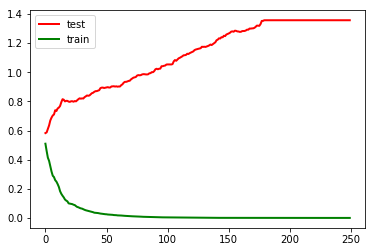

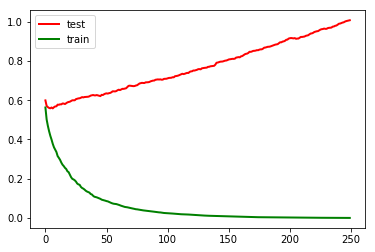

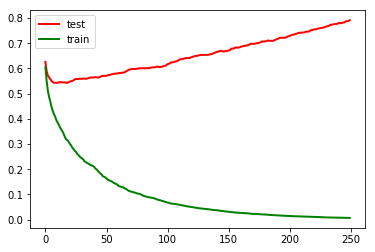

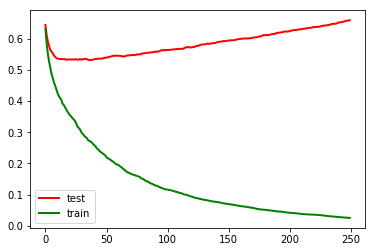

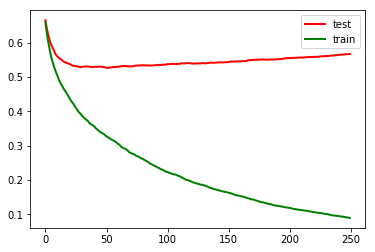

In [7]:
for i in range(5):
    plt.figure()
    plt.plot(Test[i], 'r', linewidth=2)
    plt.plot(Train[i], 'g', linewidth=2)
    plt.legend(['test', 'train'])

In [8]:
A = Test[3]
print(min(A))
print(A.index(min(A)))

0.531450796319
36


In [9]:
clf = RandomForestClassifier(n_estimators=37, random_state=241)
clf.fit(X_train, y_train)
B = clf.predict_proba(X_test)
log_loss(y_test, B)

0.54091190993698968